           ds      yhat      Month  California Average  adjusted_yhat
0  2025-01-01  0.767770 2025-01-01              18.800       1.647650
1  2025-02-01  0.596185 2025-02-01              19.150       1.303244
2  2025-03-01  0.630241 2025-03-01              19.500       1.402869
3  2025-04-01  0.847541 2025-04-01              19.850       1.920424
4  2025-05-01  0.700439 2025-05-01              20.200       1.615092
..        ...       ...        ...                 ...            ...
56 2029-09-01  0.648205 2029-09-01              44.900       3.322270
57 2029-10-01  0.616273 2029-10-01              45.425       3.195536
58 2029-11-01  0.667159 2029-11-01              45.950       3.499379
59 2029-12-01  0.524691 2029-12-01              46.475       2.783548
60 2030-01-01  0.541196 2030-01-01              47.000       2.903542

[61 rows x 5 columns]
           ds      yhat      Month  Georgia Average  adjusted_yhat
0  2025-01-01  5.132737 2025-01-01         6.500000       3.808362
1  

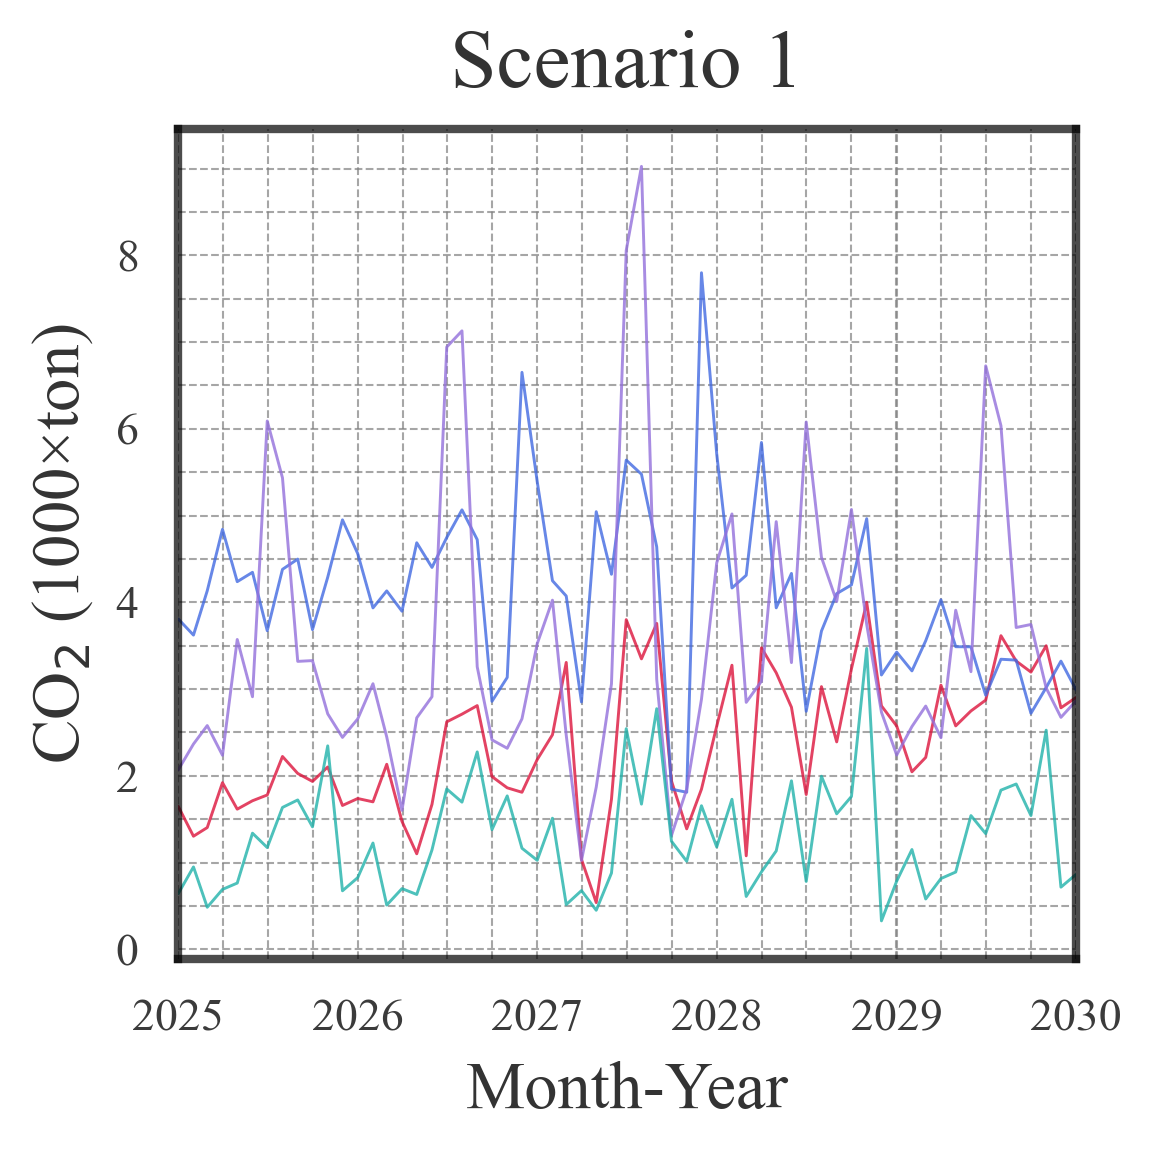

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.patches as patches
from matplotlib.lines import Line2D

# Define file paths for each state's CH4 emissions data
file_paths = {
    'California': r'C:\Users\skanigir\epa\Scripts\notebooks\GRA\Cambium\Main\2023\data\N2O\california\harmonicmean\results\n2o_cal_forecasted_results.xlsx',
    'Georgia': r'C:\Users\skanigir\epa\Scripts\notebooks\GRA\Cambium\Main\2023\data\N2O\georgia\harmonicmean\results\n2o_geo_forecasted_results.xlsx',
    'New York': r'C:\Users\skanigir\epa\Scripts\notebooks\GRA\Cambium\Main\2023\data\N2O\newyork\harmonicmean\results\n2o_new_forecasted_results.xlsx',
    'Washington': r'C:\Users\skanigir\epa\Scripts\notebooks\GRA\Cambium\Main\2023\data\N2O\washington\harmonicmean\results\n2o_was_forecasted_results.xlsx'
}

# Define the path for state average values
average_values_path = r'C:\Users\skanigir\epa\Scripts\notebooks\GRA\Cambium\Main\2023\data\EV\EV_Electricity_Consumption_Projections.xlsx'

# Define the output path for saving the graphs
output_path = r'C:\Users\skanigir\epa\Scripts\notebooks\GRA\Cambium\Main\2023\graphs'

Scenario = "Scenario 1"
Emission = "CO$_2$ (1000×ton)"  
figure = "5_a_8"

# Define colors for each state using HUSL palette
colors = ['crimson', 'royalblue', 'mediumpurple', 'lightseagreen']

# Set the plot style
sns.set(style="whitegrid")

# Set the font to Times New Roman
plt.rcParams["font.family"] = "Times New Roman"

# Load the state average values
avg_df = pd.read_excel(average_values_path)
avg_df['Month'] = pd.to_datetime(avg_df['Month'])

# Create the main plot
fig, ax = plt.subplots(figsize=(4, 4), dpi=300)  # Increased height for space at the bottom
scatter_lines = []

# Iterate over each state and plot the data
for (state, file_path), color in zip(file_paths.items(), colors):
    # Read the actual and forecasted data
    forecast_data = pd.read_excel(file_path, sheet_name='hm_forecast_Mid-case_N2O_Emissi')
    
    # Convert 'ds' to datetime
    forecast_data['ds'] = pd.to_datetime(forecast_data['ds'])
    
    # Filter the data for the years 2025 to 2030
    forecast_data = forecast_data[(forecast_data['ds'] >= '2025-01-01') & (forecast_data['ds'] <= '2030-01-01')]
    
    # Get the corresponding state average values
    state_avg_column = f'{state} Average'
    forecast_data = forecast_data.merge(avg_df[['Month', state_avg_column]], left_on='ds', right_on='Month', how='left')
    forecast_data['adjusted_yhat'] = (forecast_data['yhat']) * (forecast_data[state_avg_column] * 0.11415)
    print(forecast_data)
    # Plot actual emissions with hollow markers
    # Plot predicted emissions with a line only
    ax.plot(forecast_data['ds'], forecast_data['adjusted_yhat'], linestyle='-', alpha=0.8, color=color, linewidth=0.7)
    

# Labels and title
ax.set_xlabel('Month-Year', labelpad=5, fontsize=16, color='black', alpha=0.8)
ax.set_ylabel(Emission, labelpad=5, fontsize=16, color='black', alpha=0.8)
ax.set_title(Scenario, pad=10, fontsize=20, color='black', alpha=0.8)

# Set x-axis limit to 2030
ax.set_xlim([pd.Timestamp('2025-01-01'), pd.Timestamp('2030-01-01')])

# Set x-axis ticks to show specific years, ensuring 2025 and 2030 are included
years = [pd.Timestamp(f'{year}-01-01') for year in range(2025, 2031, 1)]
ax.set_xticks(sorted(years))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

for label in ax.get_xticklabels():
    label.set_alpha(0.9) 
for label in ax.get_yticklabels():
    label.set_alpha(0.9) 

# Add annotation with aligned text for MOVES 4.0 and FNN Model
#circle = patches.Circle((0.70, 0.85), 0.015, transform=ax.transAxes, fill=False, edgecolor='gray', linewidth=1)
#ax.add_patch(circle)
#line = Line2D([0.68, 0.72], [0.80, 0.80], transform=ax.transAxes, color='gray', linewidth=1)
#ax.add_line(line)
#ax.annotate('Cambium', xy=(0.75, 0.83), xycoords='axes fraction', fontsize=12, color='gray', ha='left')
#ax.annotate('Prophet', xy=(0.75, 0.78), xycoords='axes fraction', fontsize=12, color='gray', ha='left')

# Grid and legend
ax.grid(True, color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
ax.minorticks_on()
ax.grid(which='minor', color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Set background color
ax.set_facecolor('white')
fig.set_facecolor('white')

# Set dark black border
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_alpha(0.7)
    spine.set_linewidth(2)

# Save the main plot
#plt.savefig(f'{output_path}/{figure}.svg', format='svg')

# Show the main plot
plt.show()
